# SciPy - Librería de algorítmos científicos para Python

## Introducción

El paquete SciPy agrega características a los algorítmos de bajo nivel de NumPy para arreglos multidimensionales, y provee un gran número de algorítmos de alto nivel de uso científico. Algunos de los tópicos que cubre SciPy son:

* Funciones especiales ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integración ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimización ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolación ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Transformada de Fourier ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Procesamiento de señales ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Álgebra lineal ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Problemas de Eigenvalores de matrices dispersas ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Estadística ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Procesamiento de imágenes multi-dimensional ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* Entrada/Salida desde/hacia archivos ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

Cada uno de estos submódulos provee un muchas funciones y clases que pueden ser usadas para resolver problemas en sus respectivos tópicos.

En esta clases veremos cómo usar algunos de estos subpaquetes.

Para acceder al paquete SciPy en un programa Python, comenzamos importando todo desde el módulo `scipy`.

In [1]:
# Carga de librerias y magicvariable
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import scipy as sp 

In [3]:
print("la versión de scipy utilizada para este notebook ha sido 1.7.3 = %s" % (sp.__version__))

la versión de scipy utilizada para este notebook ha sido 1.7.3 = 1.7.3


Si sólo necesitamos usar una parte de las rutinas de SciPy podemos incluir selectivamente sólo aquellos módulos en los que estamos interesados. Por ejemplo, para incluir el paquete de álgebra lineal bajo el nombre `la`, podemos incluir:

In [6]:
import scipy.linalg as la

In [ ]:
dir(la)

## Funciones Especiales

En muchos problemas de física y química computacional son importantes varias funciones matemáticas especiales. SciPy provee implementaciones de muchas de estas funciones especiales. Para más detalles, ver la lista de funciones en la documentación http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special. 

Para demostrar el uso típico de estas funciones especiales nos concentraremos en la función de Bessel de primera especie:

$J_\alpha(x) = \sum_{m=0}^\infty \frac{(-1)^m}{m! \, \Gamma(m+\alpha+1)} {\left(\frac{x}{2}\right)}^{2m+\alpha}$


In [8]:
from scipy.special import jn, jn_zeros

In [9]:
n = 0    # orden de la función
x = 0.0

# Función de Bessel de primera especie
print("J_{}({}) = {}".format(n, x, jn(n, x)))



J_0(0.0) = 1.0


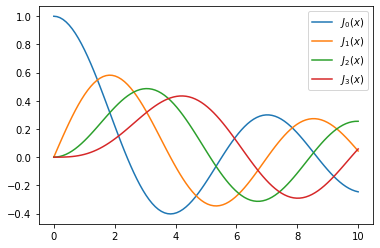

In [11]:
# El módulo scipy.special incluye muchas funciones de Bessel 
# Aquí usaremos las funciones jn e yn, que son las funciones de Bessel 
# de primera y segunda especie, y de orden real. Incluimos también las  
# funciones jn_zeros e yn_zeros que entregan los ceros de las
# funciones jn e yn.
#
# %matplotlib inline  

x = np.linspace(0, 10, 100)

for n in range(4):
    plt.plot(x, jn(n, x), label=r"$J_{}(x)$".format(n))
plt.legend()

## Integración

### Integración numérica: cuadraturas

La evaluación numérica de una función, del tipo

$\displaystyle \int_a^b f(x) dx$

es llamada *cuadratura numérica*, o simplemente *cuadratura*. SciPy suministra funciones para diferentes tipos de cuadraturas, por ejemplo las funciones `quad`, `dblquad` y `tplquad` para calcular integrales simples, dobles o triples, respectivamente.

In [12]:
from scipy.integrate import quad, dblquad, tplquad

Las función `quad` acepta una gran cantidad de argumentos opcionales, que pueden ser usados para ajustar detalles del comportamiento de la función (ingrese `help(quad)` para más detalles).

El uso básico es el siguiente:

In [13]:
# define una función simple para ser integrada
def f(x,b):
    return b*x**2

In [14]:
x_inf = 0 # el límite inferior de x
x_sup = 2 # el límite superior de x

val, errabs = quad(f, x_inf, x_sup, args=(5.,))

print("valor de la integral =", val, ", error absoluto =", errabs)

valor de la integral = 13.333333333333332 , error absoluto = 1.4802973661668753e-13


Si necesitamos incluir argumento extras en la función integrando podemos usar el argumento `args`:

In [15]:
# ceros de la funcion de Bessel 
n = 3 # order
m = 2 # numero de raizes a calcular
jn_zeros(n, m)

array([6.3801619 , 9.76102313])

In [16]:
def integrando(x, n):
    """
    función de Bessel de primera especie y orden n. 
    """
    return jn(n, x)


x_inf = 0 # el límite inferior de x
x_sup = 6.38 # el límite superior de x

val, errabs = quad(integrando, x_inf, x_sup, args=(3,)) # evalua la integral con n=3

print(val, errabs)

1.356892674608161 1.5064534892951908e-14


Para funciones simples podemos usar la función lambda function (función anónima) en lugar de definir explícitamente una función para el integrando:

In [17]:
val, errabs = quad(lambda x: np.exp(-x ** 2), -np.Inf, np.Inf) # Inf = infinito!

print("Resultado numérico  =", val, errabs)

analitico = np.sqrt(np.pi)
print("Resultado analitico =", analitico)

Resultado numérico  = 1.7724538509055159 1.4202636780944923e-08
Resultado analitico = 1.7724538509055159


Como se muestra en este ejemplo, podemos usar 'Inf' y '-Inf' como límites de la integral.

Integrales de dimensión mayor se evalúan de forma similar:

In [18]:
def integrando(x, y):
    return np.exp(-x**2-y**2)

x_inf = 0  
x_sup = 10
y_inf = 0
y_sup = 10



In [19]:
val, errabs = dblquad(integrando, x_inf, x_sup, lambda x : y_inf, lambda x: y_sup)

print(val, errabs)

0.7853981633974476 1.3753098510218528e-08


Note como requerimos incorporar funciones lambda para los límites de la integración en y, ya que estos límites pueden en general ser funciones de x.

## Álgebra lineal

El módulo de álgebra lineal contiene muchas funciones relacionadas con matrices, incluyendo resolución de ecuaciones lineales, cálculo de valores propios, funciones de matrices (por ejemplo, para exponenciación matricial), varias decomposiciones diferentes (SVD, LU, cholesky), etc. 

Una documentación detallada está disponible aquí: http://docs.scipy.org/doc/scipy/reference/linalg.html

Veremos cómo usar algunas de estas funciones:

#### **Sistemas de ecuaciones lineales**

Los sistemas de ecuaciones lineales de la forma

$A x = b$

donde $A$ es una matriz y $x,b$ son vectores, pueden ser resueltos del modo siguiente:

In [20]:
from scipy import linalg

A = np.array([[1,2,3], [4,12,6], [7,8,9]])
b = np.array([4,2,10])

In [21]:
x = linalg.solve(A, b)
x

array([-0.14285714, -0.71428571,  1.85714286])

In [22]:
# verificamos la solución
np.dot(A, x) - b

array([-4.4408921e-16,  0.0000000e+00,  0.0000000e+00])

Podemos también hacer lo mismo con

$A X = B$,

donde ahora $A, B$ y $X$ son matrices:

In [23]:
A = np.random.rand(3,3)
B = np.random.rand(3,3)

In [24]:
X = linalg.solve(A, B)

In [25]:
X

array([[ 1.13096559,  0.36960873,  0.4993138 ],
       [ 0.6749842 ,  0.96203795,  1.17255014],
       [ 0.3352335 ,  0.28699897, -0.48359495]])

In [26]:
# verificamos la solución
np.dot(A, X) - B

array([[ 0.00000000e+00,  0.00000000e+00, -8.32667268e-17],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.11022302e-16, -2.22044605e-16, -2.22044605e-16]])

#### **Valores y vectores propios**

El problema de valores propios para la matriz $A$:

$\displaystyle A v_n = \lambda_n v_n$,

donde $v_n$ es el $n$-ésimo vector propio y $\lambda_n$ es el $n$-ésimo valor propio.

Para calcular los vectores propios de una matriz usamos `eigvals` y para calcular tanto los valores como los vectores propios, podemos usar la función `eig`:

In [27]:
evals = linalg.eigvals(A)

In [28]:
evals[0]

(1.0705267884815228+0j)

In [29]:
evals, evecs = linalg.eig(A)

In [30]:
evals

array([ 1.07052679+0.j        , -0.48764233+0.31782783j,
       -0.48764233-0.31782783j])

In [31]:
evecs

array([[ 0.68073239+0.j        ,  0.60863308+0.j        ,
         0.60863308-0.j        ],
       [ 0.48087073+0.j        , -0.33956138-0.45805648j,
        -0.33956138+0.45805648j],
       [ 0.5526    +0.j        , -0.1317711 +0.53580265j,
        -0.1317711 -0.53580265j]])

Los vectores propios correspondientes al $n$-ésimo valor propio (guardado en `evals[n]`) es la $n$-ésima *columna* en `evecs`, es decir, `evecs[:,n]`. Para verificar esto, intentemos multiplicar los vectores propios con la matriz y comparar el resultado con el producto del vector propio y el valor propio:

In [32]:
n = 1

np.dot(A, evecs[:,n]) - evals[n] * evecs[:,n]

array([3.33066907e-16-1.66533454e-16j, 2.77555756e-16+1.80411242e-16j,
       1.52655666e-16+5.55111512e-17j])

#### **Operaciones matriciales**

In [33]:
# matriz inversa
linalg.inv(A)

array([[-0.46742607,  1.61852393,  0.31809031],
       [ 0.03672049, -0.61289547,  1.30097253],
       [ 1.17513805,  0.40292249, -0.86412178]])

In [34]:
# determinante
linalg.det(A)

0.3627047265017798

In [35]:
# norma de un matri
linalg.norm(A, ord=2), linalg.norm(A, ord=np.Inf)

(1.1887084021897234, 1.390176143096689)

## **Optimización**

La optimización (encontrar el máximo o el mínimo de una funciónn) constituye un campo amplio en matemáticas, y la optimización de funciones complicadas o de muchas variables puede ser complicada. Aquí sólo revisaremos algunos casos muy simples. Para una introducción detallada a la [optimización con SciPy](https://scipy-lectures.org/advanced/mathematical_optimization/index.html), está en inglés.
El resto de la documentación de scipy, muy intersante está en la página (https://scipy-lectures.org/)

Para usar el módulo de optimización de Scipy hay que importar el módulo `optimize`:

In [36]:
from scipy import optimize

### **Encontrando mímimos**

Veamos primero cómo encontrar el mínimo de una función simple de una variable:

In [37]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

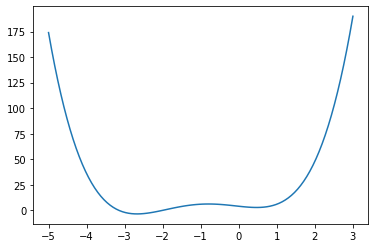

In [38]:
# dibujamos la función
x = np.linspace(-5, 3, 100)
plt.plot(x, f(x))

Podemos usar la función `fmin_bfgs` para encontrar el mínimo de la función:

In [39]:
x_min = optimize.fmin_bfgs(f, -2) # busca un mínimo local cerca -2
x_min 

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 16
         Gradient evaluations: 8


array([-2.67298151])

In [40]:
optimize.fmin_bfgs(f, 0.5)  # busca un mínimo local cerca 0.5

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 10
         Gradient evaluations: 5


array([0.46961745])

Podemos también usar las funciones `brent` o `fminbound`. Estas funciones tienen una sintaxis algo distinta y usan algoritmos diferentes.

In [41]:
optimize.brent(f)

0.46961743402759754

In [42]:
optimize.fminbound(f, -4, 2)  # busca el mínimo en el intervalo (-4,2)

-2.6729822917513886

### **Encontrando las raíces de una función**

Para encontrar las soluciones a una ecuación de la forma $f(x) = 0$ podemos usar la función `fsolve`. Ella requiere especificar un punto inicial: 

In [43]:
omega_c = 3.0
def f(omega):
    return np.tan(2*np.pi*omega) - omega_c/omega

Primero dibujamos la función en questión...

/tmp/ipykernel_9102/2455056392.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.tan(2*np.pi*omega) - omega_c/omega


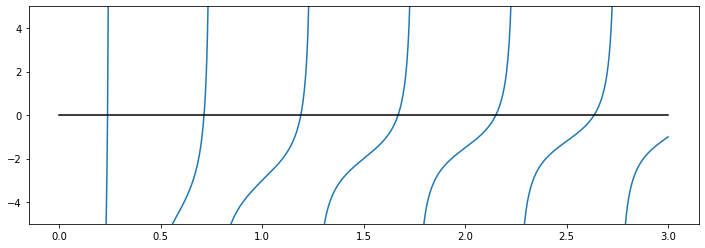

In [45]:
# uso de matplotlib
fig, ax  = plt.subplots(figsize=(12,4))
x = np.linspace(0, 3.0, 1000)
y = f(x)
mask = np.where(np.abs(y) > 50)
x[mask] = y[mask] = np.NaN # elimina líneas verticales cuando la función cambia de signo
ax.plot(x, y)
ax.plot([0, 3], [0, 0], 'k')
ax.set_ylim(-5,5);

In [46]:
optimize.fsolve(f, 0.1)

array([0.23743014])

In [47]:
optimize.fsolve(f, 0.6)

array([0.71286972])

In [48]:
optimize.fsolve(f, 1.1)

array([1.18990285])

## **Estadística**

El módulo `scipy.stats` contiene varias distribuciones estadísticas, funciones estadísticas. Para una documentación completa de estas las características, ver (en inglés):
* [Módulo stats de Scipy (Ingles)](http://scipy.github.io/devdocs/reference/stats.html#module-scipy.stats)

> También existe un paquete Python muy poderoso para modelamiento estadístoco llamado **statsmodels**. 
Ver [http://statsmodels.sourceforge.net](http://statsmodels.sourceforge.net) para más detalles.

In [49]:
from scipy import stats

crea una variable aleatoria (discreta) con distribución poissoniana

$P(k) = \frac{\mu^k e^{\mu}}{k!}$


In [50]:
# Creación variable
X = stats.poisson(3.5) # mu = 2.5  (goles promedio en un mundial)
X.pmf(1)  # Probabilidad de 0 goles en un partido del mundial.


0.10569084197811476

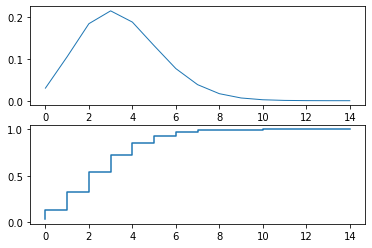

In [51]:
n = np.arange(0,15)

fig, axes = plt.subplots(2,1)

# grafica la "probability mass function" (PMF)
axes[0].plot(n, X.pmf(n),lw=1,linestyle="-")
# grafica la "commulative distribution function" (CDF)
axes[1].step(n, X.cdf(n))

#### **Distribución normal**

In [52]:
# crea una variable aleatoria (contínua) con distribución normal
Y = stats.norm(loc=1.0)

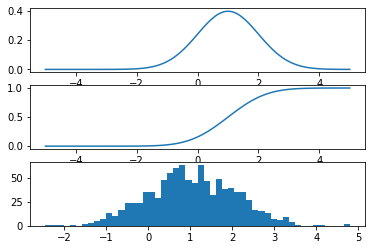

In [53]:
# Dibujo de las graficas 
x = np.linspace(-5,5,100)

fig, axes = plt.subplots(3,1)

# grafica la función distribución de probabilidad ("probability distribution function", PDF)
axes[0].plot(x, Y.pdf(x))

# grafica función de distribución acumulada ("commulative distributin function", CDF)
axes[1].plot(x, Y.cdf(x));

# grafica histograma de 1000 realizaciones aleatorias de la variable estocástica Y
axes[2].hist(Y.rvs(size=1000), bins=50);

#### **Métodos de Estadística descriptiva**:

In [54]:
X.mean(), X.std(), X.var() # distribución de Poission

(3.5, 1.8708286933869707, 3.5)

In [55]:
Y.mean(), Y.std(), Y.var() # distribucuón normal

(1.0, 1.0, 1.0)

####  Ejemplo: Impacto de cometas y meteoritos

In [56]:
# Datos de diametro en km de cometas apocalipticos que han impactado la tierra en su historia

data = [7.40, 6.90, 5.20, 6.20, 4.20, 8.10, 9.50, 7.40, 6.80, 7.50, 7.80, 6.60, 6.00, 8.60, 8.0, 7.20, 7.30, 9.00, 9.11, 9.20, 8.20, 10.01, 11.3]


In [57]:
mean, sigma = stats.norm.fit(data)
print(mean)
print(sigma)

7.718260869565216
1.556285019648346


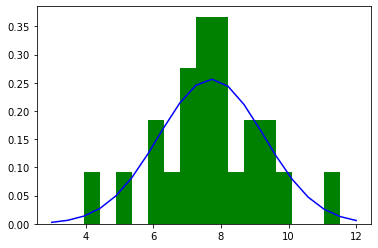

In [59]:
# Muestra la distribución gráficamente
x = np.linspace(3,12,20)

D = stats.norm(loc=mean, scale = sigma)
plt.hist(data,x,color="g", density=True)
plt.plot(x,D.pdf(x),color='b');


In [60]:
D.mean(), D.std(), D.var()

(7.718260869565216, 1.556285019648346, 2.422023062381853)

In [61]:
prob_over_10 = 1 - D.cdf(x= 10) 

In [62]:
print(prob_over_10)

0.0713044266215016


## **Regresiónes lineales**

Regresiones lineales son un métdod científico simple, que permite  predecir
una relación continua y lineal entre dos variables. En el ejemplo a continuación se quiere 
obtener la masa molecular de una gas a partir de datos reales de presión y densidad del gas. 
La masa molecular del gas se puede calcular simplemente a partir de la ecuación de los gases ideales como:

\begin{equation}
\mu = \left(\frac{\rho}{P}\right)_{P\rightarrow 0} RT
\end{equation}

donde $\rho$ es la densidad del gas. En estricto rigor esta ecuación solamente es valida en el límite $P \rightarrow 0 $. Por 
eso que hay que utilizar una regresión lineal para extrapolar los datos a P=0. Gráficamos entonces la razón $\rho/P$ vs $P$.

Considermos los siguientes presiones de gas en kPa: 

In [63]:
# Ejemplo de Regresion lineal
P = [12.223,25.20,36.97,60.37,85.23,101.3]
P = [float(x)*1000 for x in P] # en Pa⋅⋅
rho = [0.225, 0.456, 0.664, 1.062, 1.468, 1.734]
rho = [float(x)*1000 for x in rho ] # en g/m^3
P_d = []

for i in range(len(P)):
    P_d.append(float(rho[i])/float(P[i]))



Ahora que tenemos los datos podemos  visualizarlos utilizanod Matplotlib

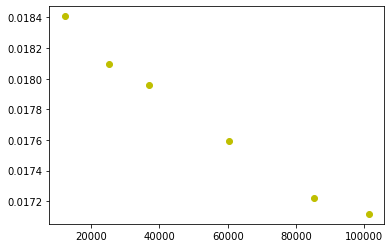

In [64]:
# Dibujamos la gráfica
plt.plot(P,P_d, 'yo')

Podemos hacer el fit lineal utulizando numpy o scipy! 

In [65]:
# Usando numpy
fit = np.polyfit(P,P_d,1)
print(fit)

# Usando scipy
fit_scipy = stats.linregress(P,P_d)
print(fit_scipy)
slope, intercept, r_value, p_value, std_err = stats.linregress(P,P_d)



[-1.44547568e-08  1.85068087e-02]
LinregressResult(slope=-1.445475684633581e-08, intercept=0.01850680871471868, rvalue=-0.9928586054695316, pvalue=7.631716992796769e-05, stderr=8.684066628950703e-10, intercept_stderr=5.414105515838178e-05)


La masa molar es: 45.875030922091106 g/mol


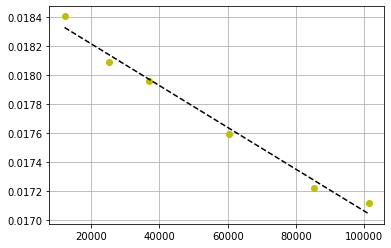

In [66]:
# Gráficamente
fit_fn = np.poly1d(fit)
plt.plot(P,P_d, 'yo', P, fit_fn(P), '--k')
#plt.legend("y = "+str(slope)+"x +"+str(intercept))

R = str(round(r_value,4))
m = str(round(slope,4))
t = str(round(intercept,4))

#plt.legend("y = "+m+"x +"+t+"   R = "+R, 'upper left')
plt.grid(True)

R = 8.314
T = 298.15

Mu = R*T*intercept

print("La masa molar es: "+str(Mu)+ " g/mol")


**Nota del Autor original notebook:**

> Versión original en inglés de J.R. Johansson (robert@riken.jp) http://dml.riken.jp/~rob/
Traducido/Adaptado por [G.F. Rubilar](http://google.com/+GuillermoRubilar) y Stefan Vogt.
La última versión de estos [notebooks de IPython](http://ipython.org/notebook.html) está disponible en [https://github.com/PythonUdeC/CPC21](https://github.com/PythonUdeC/CPC21).
La última versión del original (en inglés) de estos [notebooks de IPython](http://ipython.org/notebook.html) está disponible en [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).
Los otros notebooks de esta serie están listados en [http://jrjohansson.github.com](http://jrjohansson.github.com).

## Fin de la sección **"Scipy"**:
--------------------------
* **Validado por el Alumno:** 
* **Fecha:**